In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(train_data,train_labels),(test_data,test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [3]:
def multi_hot_sequences(sequences,dimension):
    results = np.zeros((len(sequences),dimension))
    for i , word_index in enumerate(sequences):
        results[i,word_index] = 1.0
    return results
train_data = multi_hot_sequences(train_data,dimension=10000)
test_data = multi_hot_sequences(test_data,dimension=10000)
        

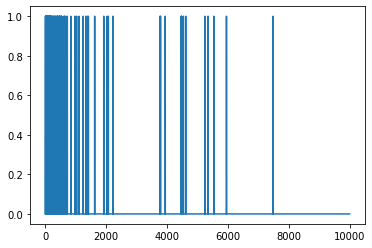

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

baseline_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,train_labels,epochs=20,
                             validation_data=(test_data,test_labels),batch_size=512,verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.5761 - accuracy: 0.6804 - binary_crossentropy: 0.5761 - val_loss: 0.4988 - val_accuracy: 0.8084 - val_binary_crossentropy: 0.4988
Epoch 2/20
25000/25000 - 4s - loss: 0.4373 - accuracy: 0.8877 - binary_crossentropy: 0.4373 - val_loss: 0.4531 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.4531
Epoch 3/20
25000/25000 - 4s - loss: 0.3598 - accuracy: 0.9347 - binary_crossentropy: 0.3598 - val_loss: 0.4061 - val_accuracy: 0.8740 - val_binary_crossentropy: 0.4061
Epoch 4/20
25000/25000 - 4s - loss: 0.2392 - accuracy: 0.9551 - binary_crossentropy: 0.2392 - val_loss: 0.3189 - val_accuracy: 0.8807 - val_binary_crossentropy: 0.3189
Epoch 5/20
25000/25000 - 4s - loss: 0.1306 - accuracy: 0.9621 - binary_crossentropy: 0.1306 - val_loss: 0.3408 - val_accuracy: 0.8750 - val_binary_crossentropy: 0.3408
Epoch 6/20
25000/25000 - 4s - loss: 0.0823 - accuracy: 0.9800 - binary_crossentropy: 0.0823 - val_loss: 0.3732

In [7]:
smaller_model = Sequential([
    layers.Dense(4,activation='relu',input_shape=(10000,)),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

smaller_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

smaller_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,train_labels,epochs=20,
                             validation_data=(test_data,test_labels),batch_size=512,verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.5979 - accuracy: 0.7124 - binary_crossentropy: 0.5979 - val_loss: 0.4722 - val_accuracy: 0.8488 - val_binary_crossentropy: 0.4722
Epoch 2/20
25000/25000 - 3s - loss: 0.3735 - accuracy: 0.8876 - binary_crossentropy: 0.3735 - val_loss: 0.3503 - val_accuracy: 0.8816 - val_binary_crossentropy: 0.3503
Epoch 3/20
25000/25000 - 3s - loss: 0.2788 - accuracy: 0.9126 - binary_crossentropy: 0.2788 - val_loss: 0.3077 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.3077
Epoch 4/20
25000/25000 - 3s - loss: 0.2312 - accuracy: 0.9266 - binary_crossentropy: 0.2312 - val_loss: 0.2900 - val_accuracy: 0.8886 - val_binary_crossentropy: 0.2900
Epoch 5/20
25000/25000 - 3s - loss: 0.2006 - accuracy: 0.9348 - binary_crossentropy: 0.2006 - val_loss: 0.2862 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2862
Epoch 6/20
25000/25000 - 3s - loss: 0.1780 - accuracy: 0.9426 - binary_crossentropy: 0.1780 - val_loss: 0.2844

In [9]:
bigger_model = Sequential([
    layers.Dense(512,activation='relu',input_shape=(10000,)),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

bigger_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data,train_labels,epochs=20,
                             validation_data=(test_data,test_labels),batch_size=512,verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 12s - loss: 0.3482 - accuracy: 0.8513 - binary_crossentropy: 0.3482 - val_loss: 0.3126 - val_accuracy: 0.8701 - val_binary_crossentropy: 0.3126
Epoch 2/20
25000/25000 - 10s - loss: 0.1443 - accuracy: 0.9474 - binary_crossentropy: 0.1443 - val_loss: 0.3271 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3271
Epoch 3/20
25000/25000 - 10s - loss: 0.0506 - accuracy: 0.9856 - binary_crossentropy: 0.0506 - val_loss: 0.4251 - val_accuracy: 0.8670 - val_binary_crossentropy: 0.4251
Epoch 4/20
25000/25000 - 10s - loss: 0.0108 - accuracy: 0.9978 - binary_crossentropy: 0.0108 - val_loss: 0.5604 - val_accuracy: 0.8657 - val_binary_crossentropy: 0.5604
Epoch 5/20
25000/25000 - 11s - loss: 0.0013 - accuracy: 1.0000 - binary_crossentropy: 0.0013 - val_loss: 0.6433 - val_accuracy: 0.8696 - val_binary_crossentropy: 0.6433
Epoch 6/20
25000/25000 - 10s - loss: 2.9823e-04 - accuracy: 1.0000 - binary_crossentropy: 2.9823e-04 - va

In [11]:
l2_model = Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

l2_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])
l2_history = l2_model.fit(train_data,train_labels,epochs=20,
                             validation_data=(test_data,test_labels),batch_size=512,verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.5633 - accuracy: 0.7698 - binary_crossentropy: 0.5486 - val_loss: 0.4211 - val_accuracy: 0.8672 - val_binary_crossentropy: 0.4068
Epoch 2/20
25000/25000 - 3s - loss: 0.3126 - accuracy: 0.9020 - binary_crossentropy: 0.2984 - val_loss: 0.3085 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2945
Epoch 3/20
25000/25000 - 4s - loss: 0.2197 - accuracy: 0.9291 - binary_crossentropy: 0.2057 - val_loss: 0.2977 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2837
Epoch 4/20
25000/25000 - 4s - loss: 0.1761 - accuracy: 0.9445 - binary_crossentropy: 0.1622 - val_loss: 0.3102 - val_accuracy: 0.8828 - val_binary_crossentropy: 0.2963
Epoch 5/20
25000/25000 - 4s - loss: 0.1469 - accuracy: 0.9558 - binary_crossentropy: 0.1330 - val_loss: 0.3325 - val_accuracy: 0.8790 - val_binary_crossentropy: 0.3186
Epoch 6/20
25000/25000 - 4s - loss: 0.1256 - accuracy: 0.9634 - binary_crossentropy: 0.1117 - val_loss: 0.3620

In [12]:
#RNN

In [13]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

In [14]:
encoder = info.features['text'].encoder

In [15]:
print('vocabulary size:{}'.format(encoder.vocab_size))

vocabulary size:8185


In [16]:
train_dataset = (train_examples.shuffle(1000).padded_batch(64,padded_shapes=([None],[])))
test_dataset = (test_examples.shuffle(1000).padded_batch(64,padded_shapes=([None],[])))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_dataset,epochs=1,validation_data = test_dataset,validation_steps=30,verbose=2)